### Statistical Analysis & Understanding Dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import encode_features, look_for_outliers, handle_outliers_iqr
# from google.colab import drive

In [36]:
# drive.mount('/content/drive')

In [37]:
df = pd.read_csv("data/students_train.csv")
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1.0,Bobby JacksOn,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,2.0,LesLie TErRy,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,3.0,DaNnY sMitH,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,4.0,andrEw waTtS,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,5.0,adrIENNE bEll,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [38]:
df.tail()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.isnull().sum()

ID                    5500
Name                  5500
Age                   5500
Gender                5500
Blood Type            5500
Medical Condition     5500
Date of Admission     5500
Doctor                5500
Hospital              5500
Insurance Provider    5500
Billing Amount        5500
Room Number           5500
Admission Type        5500
Discharge Date        5500
Medication            5500
Test Results          5500
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  float64
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  float64
 3   Gender              50000 non-null  object 
 4   Blood Type          50000 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              50000 non-null  object 
 8   Hospital            50000 non-null  object 
 9   Insurance Provider  50000 non-null  object 
 10  Billing Amount      50000 non-null  float64
 11  Room Number         50000 non-null  float64
 12  Admission Type      50000 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [41]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 55500 rows and 16 columns.


In [42]:
#Summarize categorical columns:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Name:
Name
DAvId muNoZ          2
PAUL SMith           2
TInA white           2
LOrI coOK            2
DAniEl sMIth         2
                    ..
adrIAn LynCh         1
NanCY DAughERtY      1
ryaN moss            1
MERcEdes garCIa      1
kaTheRIne WeBSTer    1
Name: count, Length: 49992, dtype: int64

Value counts for Gender:
Gender
Female    25011
Male      24989
Name: count, dtype: int64

Value counts for Blood Type:
Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64

Value counts for Medical Condition:
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64

Value counts for Date of Admission:
Date of Admission
3/16/2024     45
8/10/2023     44
12/28/2021    43
1/3/2021      43
11/4/2019     43
              ..
6/17/2021     14
2/6/2021      13
5/23/2022     13
7/22/2019

In [43]:
for col in df.columns:
        num_unique = df[col].nunique()
        print(f"Column '{col}' has {num_unique} unique values.")

Column 'ID' has 50000 unique values.
Column 'Name' has 49992 unique values.
Column 'Age' has 68 unique values.
Column 'Gender' has 2 unique values.
Column 'Blood Type' has 8 unique values.
Column 'Medical Condition' has 6 unique values.
Column 'Date of Admission' has 1827 unique values.
Column 'Doctor' has 40341 unique values.
Column 'Hospital' has 39876 unique values.
Column 'Insurance Provider' has 5 unique values.
Column 'Billing Amount' has 50000 unique values.
Column 'Room Number' has 400 unique values.
Column 'Admission Type' has 3 unique values.
Column 'Discharge Date' has 1856 unique values.
Column 'Medication' has 5 unique values.
Column 'Test Results' has 3 unique values.


In [44]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# View the duplicated rows
duplicated_rows = df[df.duplicated()]
print("\nDuplicated rows:")
print(duplicated_rows)

Number of duplicate rows: 5499

Duplicated rows:
       ID Name  Age Gender Blood Type Medical Condition Date of Admission  \
50001 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50002 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50003 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50004 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50005 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
...    ..  ...  ...    ...        ...               ...               ...   
55495 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55496 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55497 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55498 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55499 NaN  NaN  NaN    NaN        NaN               NaN               NaN   

      Doctor Hospital Insu

In [45]:
# 1. Descriptive statistics for numeric columns
numeric_desc = df.describe()
print("Descriptive Statistics (Numeric Columns):")
print(numeric_desc)

Descriptive Statistics (Numeric Columns):
                 ID           Age  Billing Amount   Room Number
count  50000.000000  50000.000000    50000.000000  50000.000000
mean   25000.500000     51.580360    25555.691557    301.032260
std    14433.901067     19.582194    14215.932247    115.228819
min        1.000000     18.000000    -2008.492140    101.000000
25%    12500.750000     35.000000    13239.403090    202.000000
50%    25000.500000     52.000000    25541.302835    302.000000
75%    37500.250000     68.000000    37853.996817    400.000000
max    50000.000000     85.000000    52764.276740    500.000000


In [46]:
# 2. Frequency distribution for top 10 values in categorical variables
categorical_cols = df.select_dtypes(include='object').columns
print("\nFrequency Distribution (Top 10 per Categorical Column):")
for col in categorical_cols:
    print(f"\nTop values in '{col}':")
    print(df[col].value_counts().head(10))


Frequency Distribution (Top 10 per Categorical Column):

Top values in 'Name':
Name
DAvId muNoZ      2
PAUL SMith       2
TInA white       2
LOrI coOK        2
DAniEl sMIth     2
aMy smiTh        2
jaMES SmITH      2
ADAM OrR         2
SHAne EsCoBAr    1
nAThAN DIAz      1
Name: count, dtype: int64

Top values in 'Gender':
Gender
Female    25011
Male      24989
Name: count, dtype: int64

Top values in 'Blood Type':
Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64

Top values in 'Medical Condition':
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64

Top values in 'Date of Admission':
Date of Admission
3/16/2024     45
8/10/2023     44
12/28/2021    43
1/3/2021      43
11/4/2019     43
8/24/2019     43
10/22/2020    42
3/28/2022     42
1/9/2022      41
9/27/2020     41
Name: count, dtyp

In [47]:
# 3. Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
                      ID       Age  Billing Amount  Room Number
ID              1.000000 -0.004243       -0.003112     0.007199
Age            -0.004243  1.000000       -0.001009    -0.000957
Billing Amount -0.003112 -0.001009        1.000000    -0.003899
Room Number     0.007199 -0.000957       -0.003899     1.000000


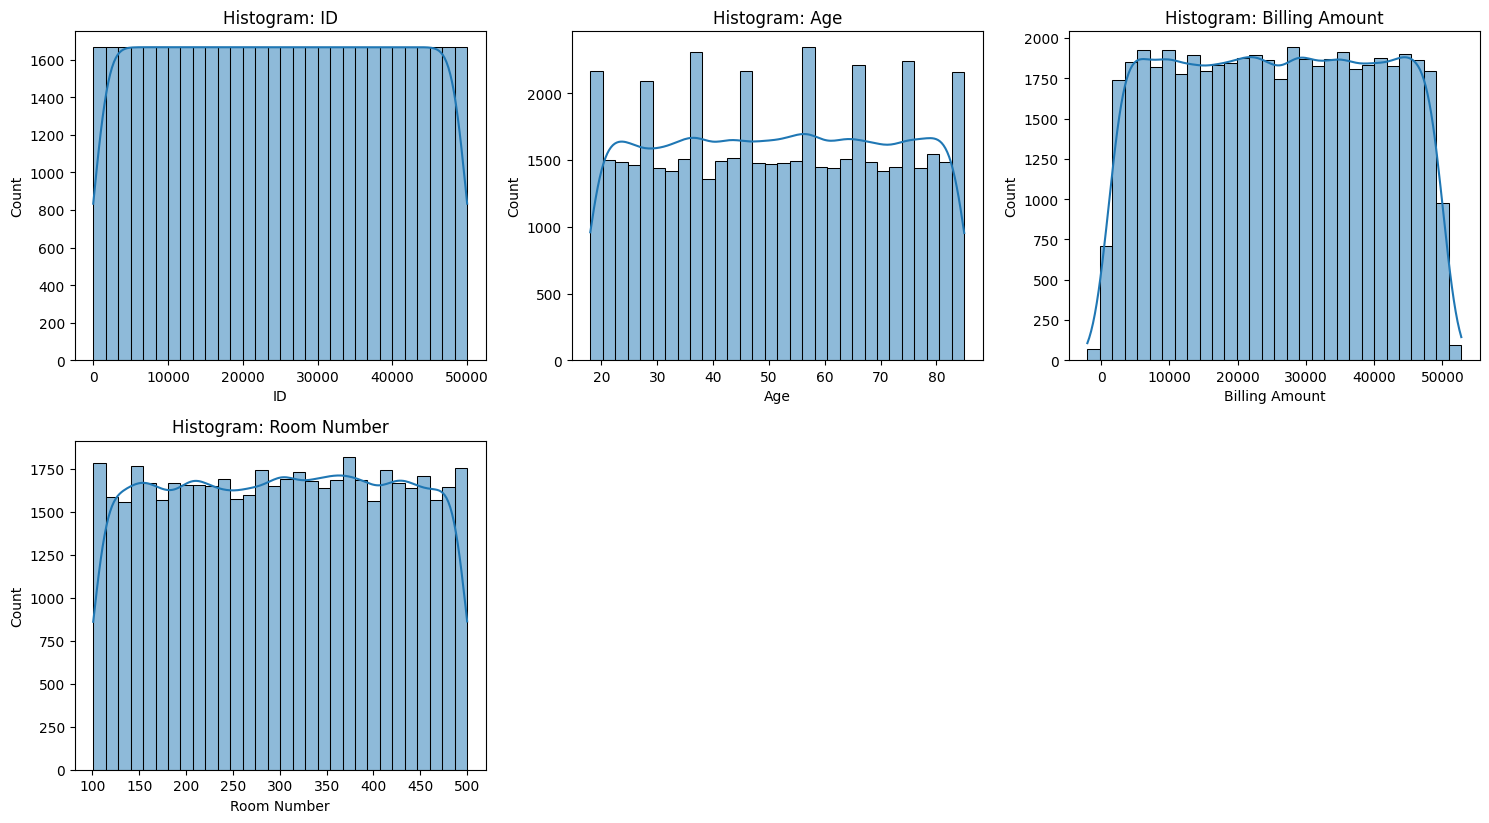

In [48]:
# 4. Distribution plots (Histograms) for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
plt.tight_layout()
plt.show()

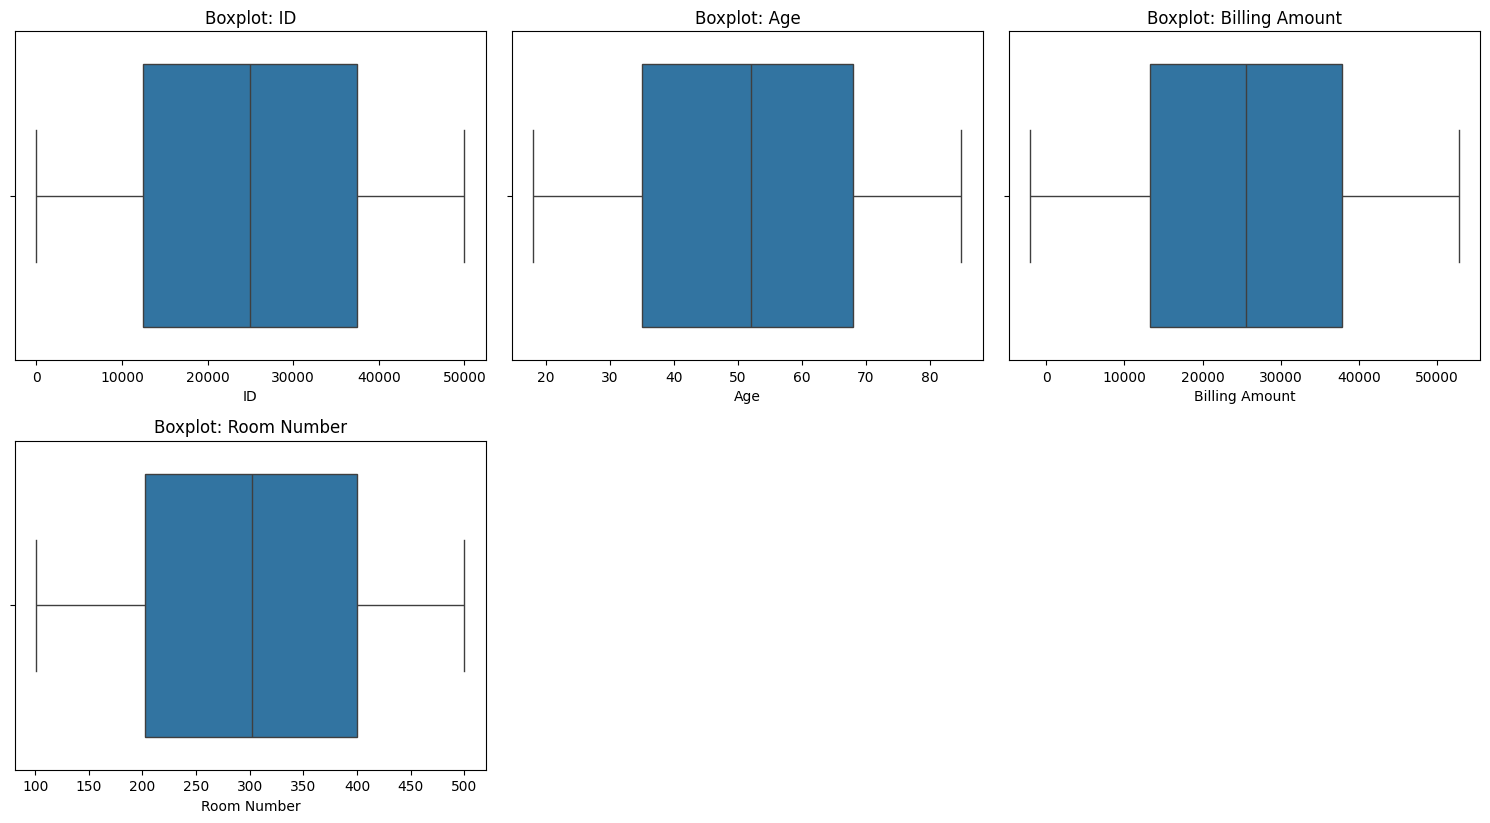

In [49]:
# 5. Boxplots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

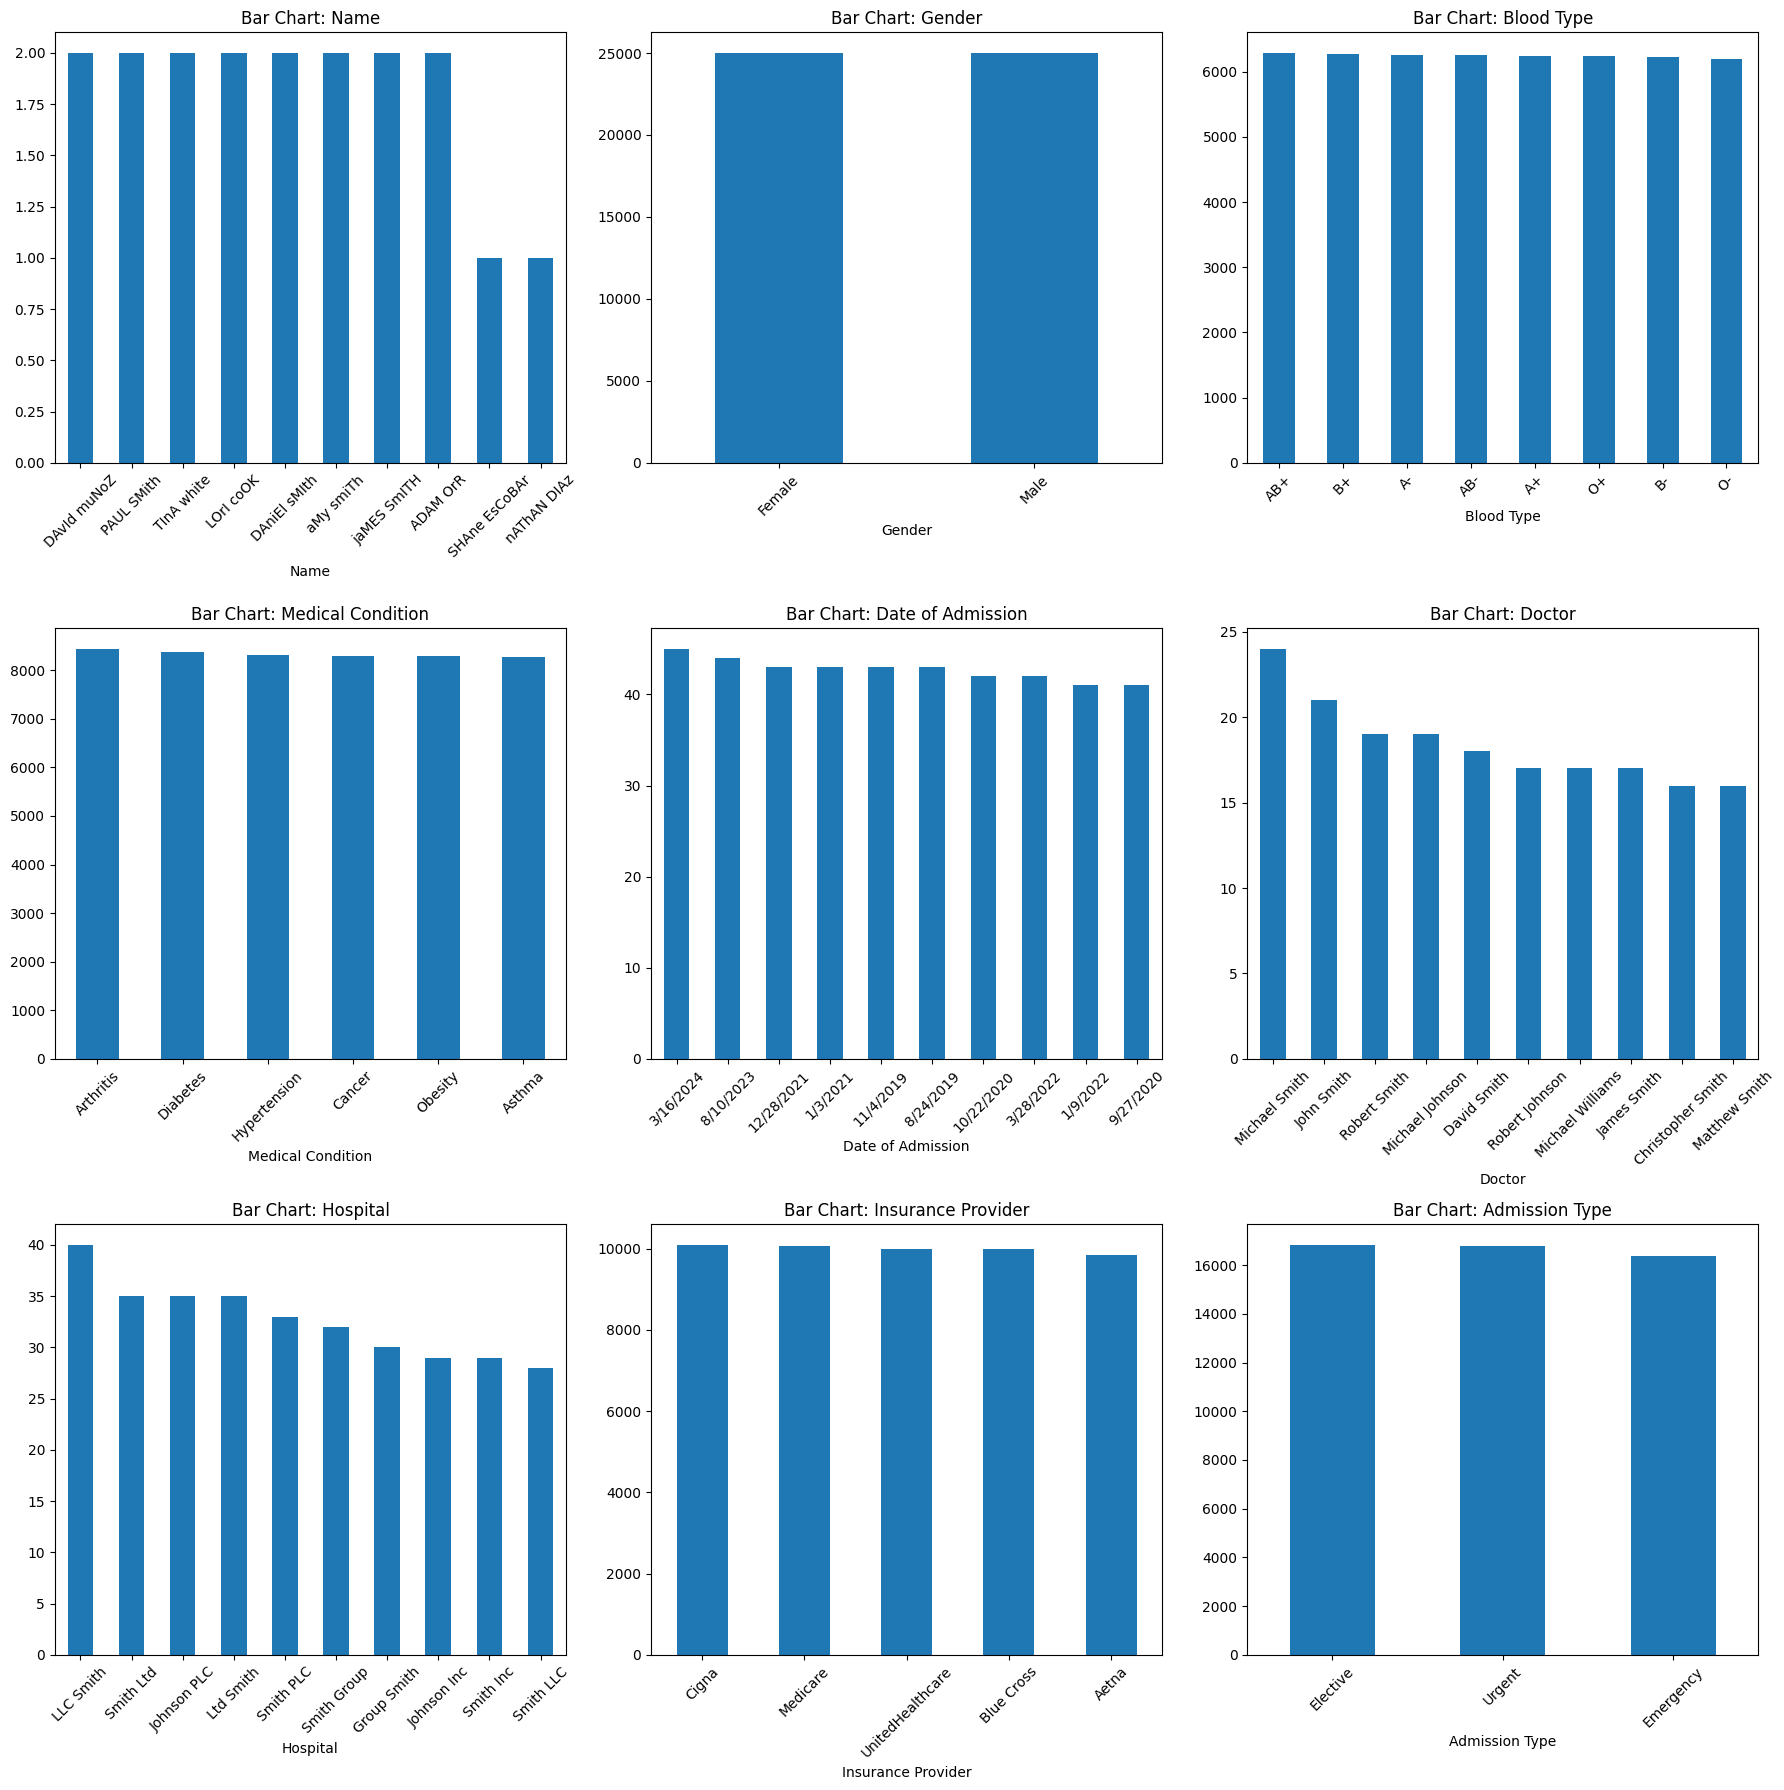

In [50]:
# 6. Bar charts for top categories
plt.figure(figsize=(18, 18))
for i, col in enumerate(categorical_cols[:9], 1):  # Limit to 9 for layout
    plt.subplot(3, 3, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

In [51]:
# Step 1: Drop rows with any missing values
df_cleaned = df.dropna()

In [52]:
df_cleaned.isnull().sum()

ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [53]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1.0,Bobby JacksOn,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,2.0,LesLie TErRy,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,3.0,DaNnY sMitH,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,4.0,andrEw waTtS,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,5.0,adrIENNE bEll,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [54]:
# Step 2: Standardize text-based categorical fields
df_cleaned['Name'] = df_cleaned['Name'].str.title()
df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()
df_cleaned['Medical Condition'] = df_cleaned['Medical Condition'].str.capitalize()
df_cleaned['Doctor'] = df_cleaned['Doctor'].str.title()
df_cleaned['Hospital'] = df_cleaned['Hospital'].str.title()
df_cleaned['Insurance Provider'] = df_cleaned['Insurance Provider'].str.title()
df_cleaned['Medication'] = df_cleaned['Medication'].str.capitalize()
df_cleaned['Test Results'] = df_cleaned['Test Results'].str.capitalize()
df_cleaned['Admission Type'] = df_cleaned['Admission Type'].str.capitalize()


C:\Users\Fady\AppData\Local\Temp\ipykernel_52140\2601922767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name'] = df_cleaned['Name'].str.title()
C:\Users\Fady\AppData\Local\Temp\ipykernel_52140\2601922767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()
C:\Users\Fady\AppData\Local\Temp\ipykernel_52140\2601922767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [55]:
# Step 3: Convert date columns to datetime
df_cleaned['Date of Admission'] = pd.to_datetime(df_cleaned['Date of Admission'], errors='coerce')
df_cleaned['Discharge Date'] = pd.to_datetime(df_cleaned['Discharge Date'], errors='coerce')

C:\Users\Fady\AppData\Local\Temp\ipykernel_52140\154397803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date of Admission'] = pd.to_datetime(df_cleaned['Date of Admission'], errors='coerce')
C:\Users\Fady\AppData\Local\Temp\ipykernel_52140\154397803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Discharge Date'] = pd.to_datetime(df_cleaned['Discharge Date'], errors='coerce')


In [56]:
# Calculate Length of Stay
df_cleaned['Length of Stay'] = (df_cleaned['Discharge Date'] - df_cleaned['Date of Admission']).dt.days

# Reorder columns: insert 'Length of Stay' before 'Target'
target_index = df_cleaned.columns.get_loc('Test Results')
cols = list(df_cleaned.columns)
# Move 'Length of Stay' to the position before 'Target'
cols.insert(target_index, cols.pop(cols.index('Length of Stay')))
df_cleaned = df_cleaned[cols]

C:\Users\Fady\AppData\Local\Temp\ipykernel_52140\2531696295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Length of Stay'] = (df_cleaned['Discharge Date'] - df_cleaned['Date of Admission']).dt.days


In [57]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Length of Stay,Test Results
0,1.0,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28131,328.0,Urgent,2024-02-02,Paracetamol,2,Normal
1,2.0,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,2019-08-26,Ibuprofen,6,Inconclusive
2,3.0,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.09608,205.0,Emergency,2022-10-07,Aspirin,15,Normal
3,4.0,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78241,450.0,Elective,2020-12-18,Ibuprofen,30,Abnormal
4,5.0,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,2022-10-09,Penicillin,20,Abnormal


In [58]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
missing_df = pd.DataFrame({'Feature': df_cleaned.columns, 'Missing Percentage': missing_percentage})
print(missing_df)

                               Feature  Missing Percentage
ID                                  ID                 0.0
Name                              Name                 0.0
Age                                Age                 0.0
Gender                          Gender                 0.0
Blood Type                  Blood Type                 0.0
Medical Condition    Medical Condition                 0.0
Date of Admission    Date of Admission                 0.0
Doctor                          Doctor                 0.0
Hospital                      Hospital                 0.0
Insurance Provider  Insurance Provider                 0.0
Billing Amount          Billing Amount                 0.0
Room Number                Room Number                 0.0
Admission Type          Admission Type                 0.0
Discharge Date          Discharge Date                 0.0
Medication                  Medication                 0.0
Length of Stay          Length of Stay                 0

In [59]:
df_cleaned.duplicated().sum()

0

In [60]:
df_cleaned.isnull().sum()

ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Length of Stay        0
Test Results          0
dtype: int64

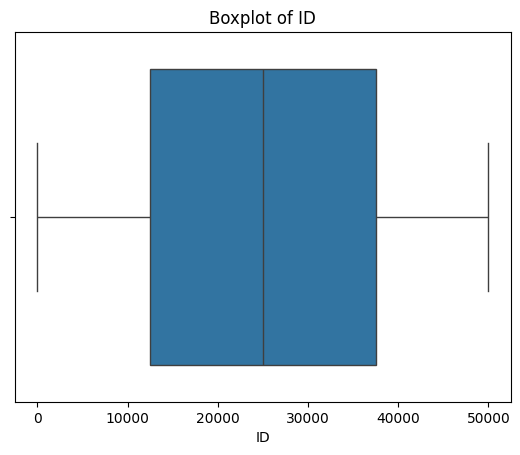

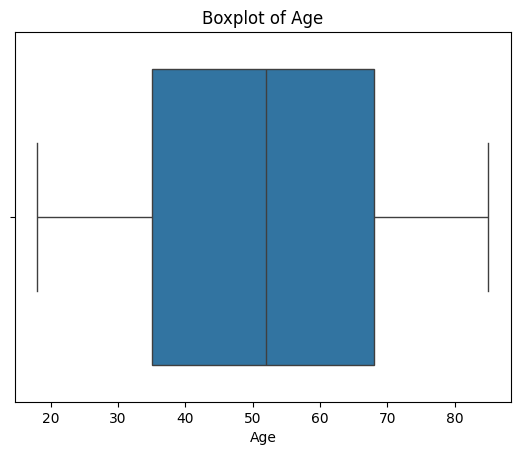

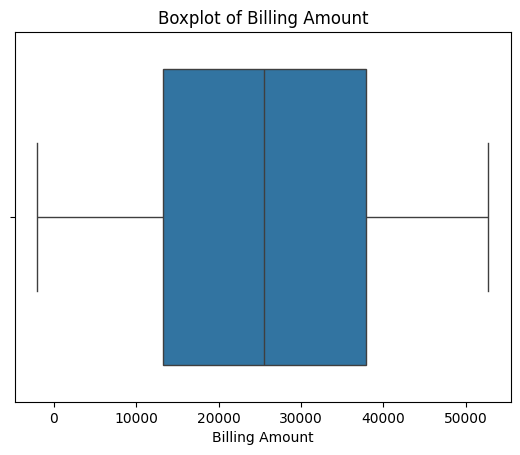

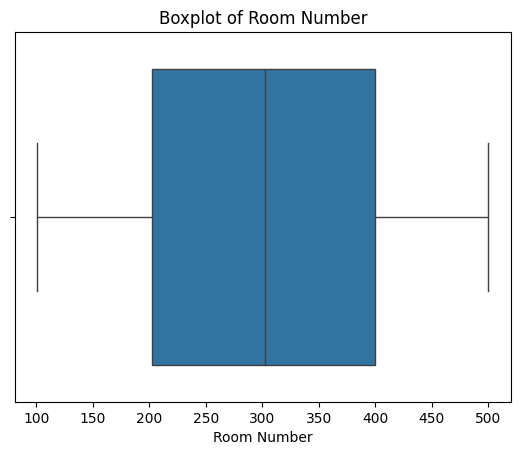

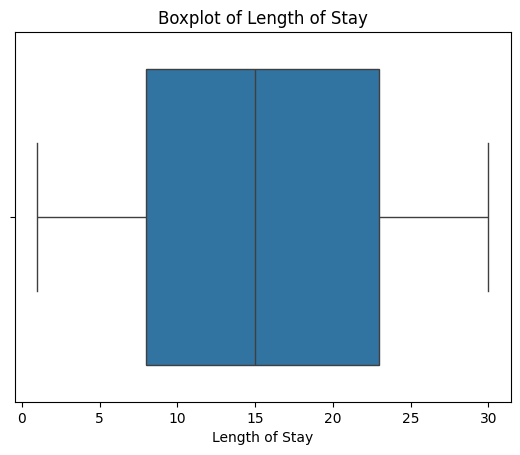

In [61]:
look_for_outliers(df_cleaned)

In [62]:
# List of numerical features
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply the function to handle outliers
df = handle_outliers_iqr(df_cleaned, numerical_features)

Feature: ID, Outliers Detected: 0
 - Lower Bound: -24998.50, Upper Bound: 74999.50

Feature: Age, Outliers Detected: 0
 - Lower Bound: -14.50, Upper Bound: 117.50

Feature: Billing Amount, Outliers Detected: 0
 - Lower Bound: -23682.49, Upper Bound: 74775.89

Feature: Room Number, Outliers Detected: 0
 - Lower Bound: -95.00, Upper Bound: 697.00

Feature: Length of Stay, Outliers Detected: 0
 - Lower Bound: -14.50, Upper Bound: 45.50



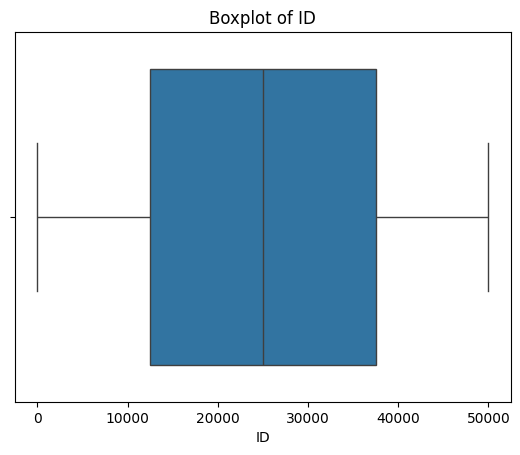

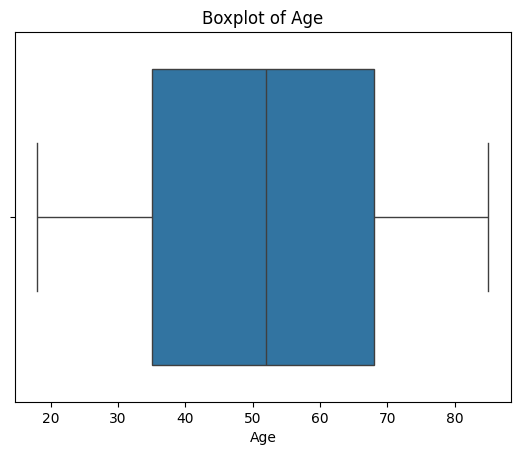

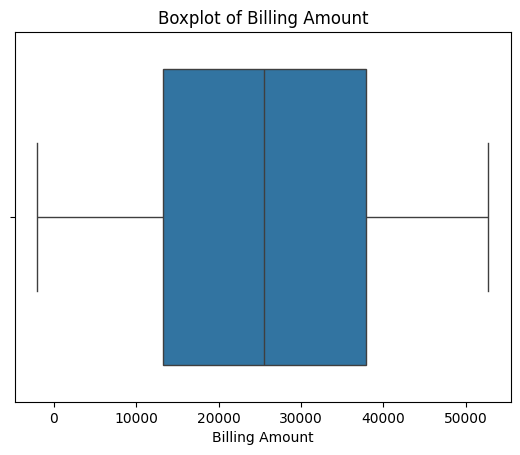

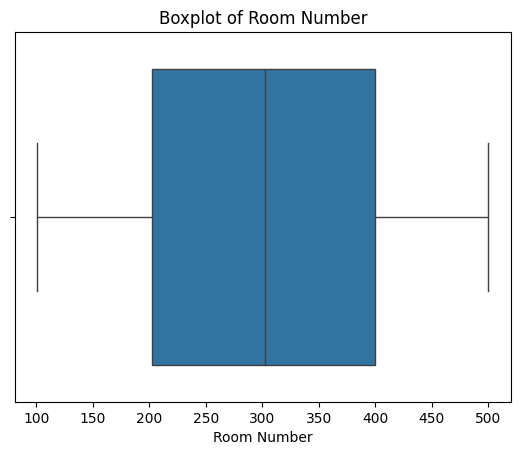

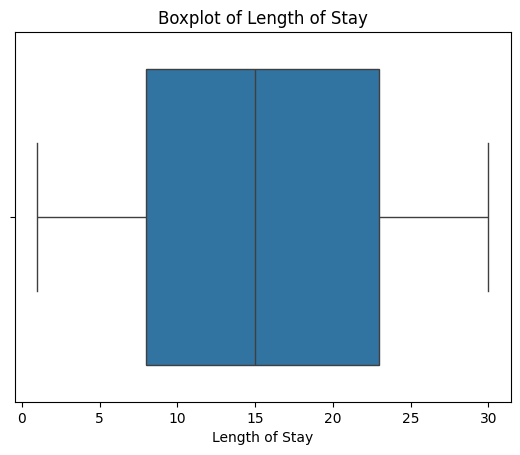

In [63]:
look_for_outliers(df)

In [64]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                               Feature       Data Type
ID                                  ID         float64
Name                              Name          object
Age                                Age         float64
Gender                          Gender          object
Blood Type                  Blood Type          object
Medical Condition    Medical Condition          object
Date of Admission    Date of Admission  datetime64[ns]
Doctor                          Doctor          object
Hospital                      Hospital          object
Insurance Provider  Insurance Provider          object
Billing Amount          Billing Amount         float64
Room Number                Room Number         float64
Admission Type          Admission Type          object
Discharge Date          Discharge Date  datetime64[ns]
Medication                  Medication          object
Length of Stay          Length of Stay         float64
Test Results              Test Results          object


In [65]:
# Drop ID and Name (optional)
df.drop(columns=['ID', 'Name', 'Room Number'], inplace=True)

X_encoded, y_encoded = encode_features(df, target_col="Test Results")
df = pd.concat([X_encoded, y_encoded.rename("Test Results")], axis=1)

c:\Users\Fady\Desktop\Healthcare Results Predictions - Machine Learning\Healthcare-test-results-classification-using-ML\utils\encoding.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace(binary_map)


Blood Type has 8 unique features
Medical Condition has 6 unique features
Doctor has 40341 unique features
Hospital has 39876 unique features
Insurance Provider has 5 unique features
Medication has 5 unique features


In [66]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                                                                 Feature  \
Age                                                                  Age   
Gender                                                            Gender   
Date of Admission                                      Date of Admission   
Doctor                                                            Doctor   
Hospital                                                        Hospital   
Billing Amount                                            Billing Amount   
Admission Type                                            Admission Type   
Discharge Date                                            Discharge Date   
Length of Stay                                            Length of Stay   
Blood Type_A+                                              Blood Type_A+   
Blood Type_A-                                              Blood Type_A-   
Blood Type_AB+                                            Blood Type_AB+   
Blood Type_A

In [67]:
df.head()

,Age,Gender,Date of Admission,Doctor,Hospital,Billing Amount,Admission Type,Discharge Date,Length of Stay,Blood Type_A+,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_Unitedhealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
0,30.0,0,2024-01-31,1.174520,1.031558,18856.28131,1,2024-02-02,2.0,False,...,True,False,False,False,False,False,False,True,False,2
1,62.0,0,2019-08-20,0.998469,0.932649,33643.32729,2,2019-08-26,6.0,True,...,False,False,True,False,False,True,False,False,False,1
2,76.0,1,2022-09-22,1.128577,1.082526,27955.09608,2,2022-10-07,15.0,False,...,False,False,False,False,True,False,False,False,False,2
3,28.0,1,2020-11-18,0.868361,0.868361,37909.78241,0,2020-12-18,30.0,False,...,False,False,True,False,False,True,False,False,False,0
4,43.0,1,2022-09-19,0.868361,0.868361,14238.31781,1,2022-10-09,20.0,False,...,False,False,False,False,False,False,False,False,True,0
